# Exploring NEON eddy covariance data at JORN

2019-12-2 by Greg Maurer

This demo is based on https://www.neonscience.org/eddy-data-intro

In [1]:
# Attach libraries and set options
library(neonUtilities)
library(repr)
options(stringsAsFactors=F)
options(repr.plot.width = 4.5, repr.plot.height = 5)

## Download and unpack data

In [2]:
# Download hdf5 files to your favorite directory. This will download
# 10 archive files (one month/site each)
# (for EC data they are large)
zipsByProduct(dpID="DP4.00200.001", package="basic", 
              site=c("JORN", "SRER"), 
              startdate="2018-05", enddate="2018-09",
              savepath="~/NEONdata", 
              check.size=F)

Warning message in dir.create(filepath):
“'/Users/gmaurer/NEONdata/filesToStack00200' already exists”

  |======================================================================| 100%
10 files downloaded to ~/NEONdata/filesToStack00200


In [3]:
# stackEddy extracts the hdf5 aarchives and stacks to a list of dataframes
# dp04 is the qaqc level of data to extract
flux <- stackEddy(filepath="~/NEONdata/filesToStack00200/",
                  level="dp04")

Extracting data
  |======================================================================| 100%
Stacking data tables by month
  |======================================================================| 100%
Joining data variables
  |======================================================================| 100%


In [4]:
# Look at what you get
names(flux) # Dataframes in list
head(flux$JORN) # Head of JORN dataframe
tail(flux$variables) # Last 4 variables in list
tail(flux$objDesc)

[1] "JORN"      "SRER"      "variables" "objDesc"

timeBgn,timeEnd,data.fluxCo2.nsae.flux,data.fluxCo2.stor.flux,data.fluxCo2.turb.flux,data.fluxH2o.nsae.flux,data.fluxH2o.stor.flux,data.fluxH2o.turb.flux,data.fluxMome.turb.veloFric,data.fluxTemp.nsae.flux,⋯,data.foot.stat.veloFric,data.foot.stat.distZaxsMeasDisp,data.foot.stat.distZaxsRgh,data.foot.stat.distZaxsAbl,data.foot.stat.distXaxs90,data.foot.stat.distXaxsMax,data.foot.stat.distYaxs90,qfqm.fluxCo2.stor.qfFinl,qfqm.fluxH2o.stor.qfFinl,qfqm.fluxTemp.stor.qfFinl
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
2018-05-01T00:00:00.000Z,2018-05-01T00:29:59.000Z,NaN,NaN,-0.16348818,NaN,NaN,6.4478328,0.5823816,NaN,⋯,0.5823816,8.34,0.02113948,1000,408.66,158.46,25.02,1,1,1
2018-05-01T00:30:00.000Z,2018-05-01T00:59:59.000Z,-0.05089582,0.006851492,-0.05774731,3.8529462,-0.6100203,4.4629666,0.5159059,NaN,⋯,0.5159059,8.34,0.01273324,1000,417.00,166.80,25.02,1,1,1
2018-05-01T01:00:00.000Z,2018-05-01T01:29:59.000Z,0.13008816,0.017533803,0.11255435,2.7682301,-0.3165084,3.0847386,0.5392307,NaN,⋯,0.5392307,8.34,0.05265187,1000,375.30,150.12,25.02,1,1,1
2018-05-01T01:30:00.000Z,2018-05-01T01:59:59.000Z,0.34843222,0.004986555,0.34344567,1.6950786,-0.2054979,1.9005766,0.5203455,NaN,⋯,0.5203455,8.34,0.05728781,1000,366.96,141.78,25.02,1,1,1
2018-05-01T02:00:00.000Z,2018-05-01T02:29:59.000Z,0.35888594,0.043186761,0.31569918,1.3522010,-0.1321038,1.4843047,0.4153305,NaN,⋯,0.4153305,8.34,0.05929073,1000,333.60,133.44,16.68,1,1,1
2018-05-01T02:30:00.000Z,2018-05-01T02:59:59.000Z,0.26392441,0.001938411,0.26198599,0.9541738,0.5421482,0.4120256,0.3302027,NaN,⋯,0.3302027,8.34,0.07957886,1000,300.24,125.10,16.68,1,1,1


,category,system,variable,stat,units
,<chr>,<chr>,<chr>,<chr>,<chr>
19,data,foot,stat,distXaxs90,m
20,data,foot,stat,distXaxsMax,m
21,data,foot,stat,distYaxs90,m
22,qfqm,fluxCo2,stor,,NA
23,qfqm,fluxH2o,stor,,NA
24,qfqm,fluxTemp,stor,,NA


,Object,Description
,<chr>,<chr>
641,VersEddy,Version number of the eddy4R code used for processing
642,VersFmw,Firmware version that the sensor is running
643,WOOD,Woodworth NEON site code
644,WREF,Wind River Experimental Forest NEON site code
645,YELL,Yellowstone Northern Range (Frog Rock) NEON site code
646,ZoneTime,Local time zone of the measurement site


In [5]:
# The objDesc table contains definitions for many of the terms used in the
# eddy flux data product, but it isn't complete. To get the terms of interest,
# break up the column headers into individual terms and look for them in the
# objDesc table:
term <- unlist(strsplit(names(flux$JORN), split=".", fixed=T))
flux$objDesc[which(flux$objDesc$Object %in% term),]

,Object,Description
,<chr>,<chr>
138,angZaxsErth,Wind direction
171,data,Represents data fields
343,qfFinl,"The final quality flag indicating if the data are valid for the given aggregation period (1=fail, 0=pass)"
420,qfqm,"Quality flag and quality metrics, represents quality flags and quality metrics that accompany the provided data"
604,timeBgn,The beginning time of the aggregation period
605,timeEnd,The end time of the aggregation period


In [6]:
#The flux components are
# turb: Turbulent flux
# stor: Storage
# nsae: Net surface-atmosphere exchange

#The variables table contains the units for each field:
flux$variables

category,system,variable,stat,units
<chr>,<chr>,<chr>,<chr>,<chr>
data,fluxCo2,nsae,,umolCo2 m-2 s-1
data,fluxCo2,stor,,umolCo2 m-2 s-1
data,fluxCo2,turb,,umolCo2 m-2 s-1
data,fluxH2o,nsae,,W m-2
data,fluxH2o,stor,,W m-2
data,fluxH2o,turb,,W m-2
data,fluxMome,turb,,m s-1
data,fluxTemp,nsae,,W m-2
data,fluxTemp,stor,,W m-2


## Plot basic flux data

In [7]:
# To plot data you must convert time stamps to an R datetime format
conv_tstamps <- function(df){
    timeB <- substring(df$timeBgn, 1, nchar(df$timeBgn)-4)
    timeB <- strptime(timeB, format="%Y-%m-%dT%H:%M:%S", tz="GMT")
    timeB <- as.POSIXct(timeB)
    df <- cbind(timeB, df)
    return(df)
}

flux$JORN <- conv_tstamps(flux$JORN)
flux$SRER <-conv_tstamps(flux$SRER)

Warning message in plot.window(...):
“"format" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"format" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"format" is not a graphical parameter”Warning message in box(...):
“"format" is not a graphical parameter”Warning message in title(...):
“"format" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"format" is not a graphical parameter”

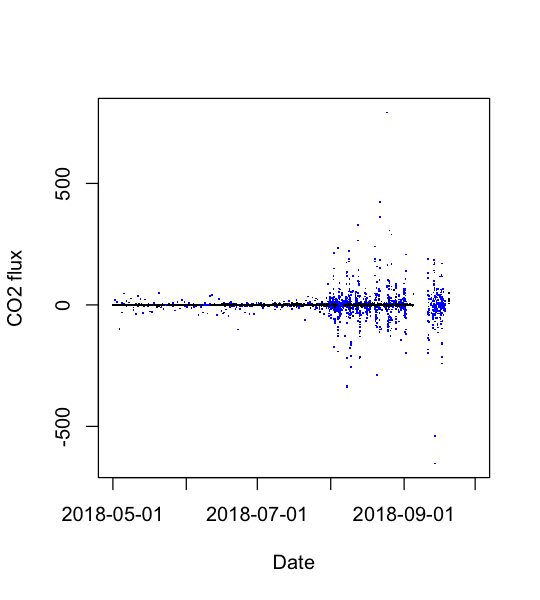

In [8]:
# Plot Jornada (blue) and SRER(black)
plot(data.fluxCo2.nsae.flux~timeB, data=flux$JORN, col='blue', pch=".",
    xlab="Date", ylab="CO2 flux", format="%Y-%m-%d")
points(data.fluxCo2.nsae.flux~timeB, data=flux$SRER, pch=".",
    xlab="Date", ylab="CO2 flux", format="%Y-%m-%d")

Warning message in plot.window(...):
“"format" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"format" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"format" is not a graphical parameter”Warning message in box(...):
“"format" is not a graphical parameter”Warning message in title(...):
“"format" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"format" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"format" is not a graphical parameter”Warning message in plot.window(...):
“"format" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"format" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"format" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"format" is not a graphical parameter”Warning message in

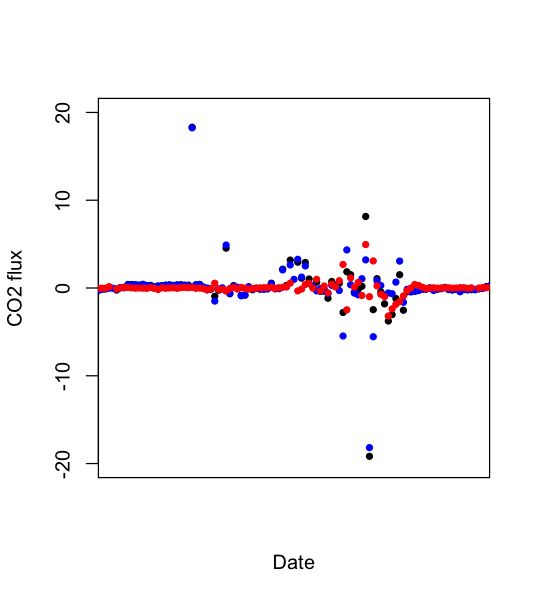

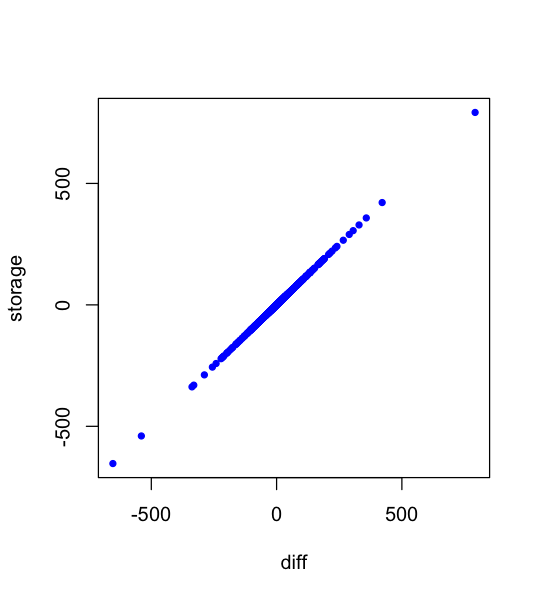

In [9]:
# Plot the turbulent flux, storage, and net exchage (nsae)
# and a one-one plot
# nsae = turbulent flux - storage

plot(data.fluxCo2.nsae.flux~timeB, data=flux$JORN, 
     pch=20, xlab="Date", ylab="CO2 flux",
     xlim=c(as.POSIXct("2018-07-07", tz="GMT"),
            as.POSIXct("2018-07-09", tz="GMT")),
     ylim=c(-20,20), format="%Y-%m-%d")

points(data.fluxCo2.turb.flux~timeB, data=flux$JORN,
     pch=20, xlab="Date", ylab="CO2 flux", col='blue',
     xlim=c(as.POSIXct("2018-07-07", tz="GMT"),
            as.POSIXct("2018-07-09", tz="GMT")),
     ylim=c(-20,20), format="%Y-%m-%d")

points(data.fluxCo2.stor.flux~timeB, data=flux$JORN,
       pch=20, xlab="Date", ylab="CO2 flux", col='red',
       xlim=c(as.POSIXct("2018-07-07", tz="GMT"),
              as.POSIXct("2018-07-09", tz="GMT")),
       ylim=c(-20,20), format="%Y-%m-%d")

# 1:1 (nsae = turbulent flux - storage)
plot(flux$JORN$data.fluxCo2.nsae.flux - flux$JORN$data.fluxCo2.turb.flux,
     flux$JORN$data.fluxCo2.stor.flux,# data=flux$JORN,
       pch=20, xlab="diff", ylab="storage", col='blue',
       #xlim=c(as.POSIXct("2018-07-07", tz="GMT"),
      #        as.POSIXct("2018-07-09", tz="GMT")),
       format="%Y-%m-%d")

## Merge with other sensor data

In [10]:
# Download PAR for JORN and get top sensor
pr <- loadByProduct("DP1.00024.001", site="JORN", avg=30,
                    startdate="2018-06", enddate="2018-07",
                    package="basic", check.size=F)

pr.top <- pr$PARPAR_30min[which(pr$PARPAR_30min$verticalPosition==
                                max(pr$PARPAR_30min$verticalPosition)),]

  |======================================================================| 100%

Stacking table PARPAR_30min
  |======================================================================| 100%
Finished: All of the data are stacked into 1 tables!
Copied the first available variable definition file to /stackedFiles and renamed as variables.csv
Stacked PARPAR_30min which has 11712 out of the expected 11712 rows (100%).
Stacking took 0.318336 secs
All unzipped monthly data folders have been removed.


In [11]:
# Convert timestamps - this data has different timestamps,
# so can't use other function
timeB <- strptime(pr.top$startDateTime, 
                  format="%Y-%m-%dT%H:%M:%SZ", 
                  tz="GMT")
timeB <- as.POSIXct(timeB)
pr.top <- cbind(timeB, pr.top)


In [12]:
fx.pr <- merge(pr.top, flux$JORN, by="timeB")

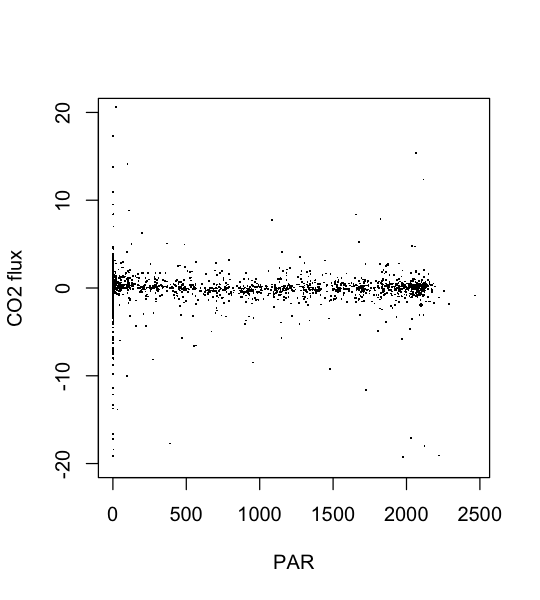

In [13]:
plot(fx.pr$data.fluxCo2.nsae.flux~fx.pr$PARMean,
     pch=".", ylim=c(-20,20),
     xlab="PAR", ylab="CO2 flux")

## Vertical profile data

(This analysis is more interesting with canopied forest data, like HARV)

In [14]:
# Profile interpolated in time and space
prof <- stackEddy(filepath="~/NEONdata/filesToStack00200",
                  level="dp03")

Extracting data
  |======================================================================| 100%
Stacking data tables by month
  |======================================================================| 100%
Joining data variables
  |======================================================================| 100%


In [15]:
head(prof$JORN)

timeBgn,timeEnd,data.co2Stor.rateRtioMoleDryCo2.0.1 m,data.co2Stor.rateRtioMoleDryCo2.0.2 m,data.co2Stor.rateRtioMoleDryCo2.0.3 m,data.co2Stor.rateRtioMoleDryCo2.0.4 m,data.co2Stor.rateRtioMoleDryCo2.0.5 m,data.co2Stor.rateRtioMoleDryCo2.0.6 m,data.co2Stor.rateRtioMoleDryCo2.0.7 m,data.co2Stor.rateRtioMoleDryCo2.0.8 m,⋯,qfqm.tempStor.rateTemp.7.7 m,qfqm.tempStor.rateTemp.7.8 m,qfqm.tempStor.rateTemp.7.9 m,qfqm.tempStor.rateTemp.8 m,qfqm.tempStor.rateTemp.8.1 m,qfqm.tempStor.rateTemp.8.2 m,qfqm.tempStor.rateTemp.8.3 m,qfqm.tempStor.rateTemp.8.4 m,qfqm.tempStor.rateTemp.8.5 m,qfqm.tempStor.rateTemp.8.6 m
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2018-05-01T00:00:00.000Z,2018-05-01T00:29:59.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⋯,1,1,1,1,1,1,1,1,1,1
2018-05-01T00:30:00.000Z,2018-05-01T00:59:59.000Z,8.504387e-05,8.504387e-05,8.504387e-05,8.504387e-05,8.728272e-05,9.287985e-05,9.847699e-05,1.040741e-04,⋯,1,1,1,1,1,1,1,1,1,1
2018-05-01T01:00:00.000Z,2018-05-01T01:29:59.000Z,9.043523e-05,9.043523e-05,9.043523e-05,9.043523e-05,8.756300e-05,8.038242e-05,7.320184e-05,6.602126e-05,⋯,1,1,1,1,1,1,1,1,1,1
2018-05-01T01:30:00.000Z,2018-05-01T01:59:59.000Z,2.098987e-04,2.098987e-04,2.098987e-04,2.098987e-04,2.044961e-04,1.909896e-04,1.774832e-04,1.639767e-04,⋯,1,1,1,1,1,1,1,1,1,1
2018-05-01T02:00:00.000Z,2018-05-01T02:29:59.000Z,-9.208961e-05,-9.208961e-05,-9.208961e-05,-9.208961e-05,-8.341914e-05,-6.174297e-05,-4.006679e-05,-1.839062e-05,⋯,1,1,1,1,1,1,1,1,1,1
2018-05-01T02:30:00.000Z,2018-05-01T02:59:59.000Z,2.283909e-05,2.283909e-05,2.283909e-05,2.283909e-05,1.989083e-05,1.252016e-05,5.149502e-06,-2.221160e-06,⋯,1,1,1,1,1,1,1,1,1,1


In [16]:
# Profile NOT interpolated in time and space
prof.12 <- stackEddy(filepath="~/NEONdata/filesToStack00200/",
                     level="dp02")

Extracting data
  |======================================================================| 100%
Stacking data tables by month
  |======================================================================| 100%
Joining data variables
  |======================================================================| 100%


In [17]:
head(prof.12$JORN)

verticalPosition,timeBgn,timeEnd,data.co2Stor.rateRtioMoleDryCo2.mean,data.h2oStor.rateRtioMoleDryH2o.mean,data.tempStor.rateTemp.mean,qfqm.co2Stor.rateRtioMoleDryCo2.qfFinl,qfqm.h2oStor.rateRtioMoleDryH2o.qfFinl,qfqm.tempStor.rateTemp.qfFinl
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
010,2018-05-01T00:00:00.000Z,2018-05-01T00:29:59.000Z,NaN,NaN,NaN,1,1,1
010,2018-05-01T00:30:00.000Z,2018-05-01T00:59:59.000Z,8.504387e-05,-4.673476e-05,NaN,1,1,1
010,2018-05-01T01:00:00.000Z,2018-05-01T01:29:59.000Z,9.043523e-05,-3.829738e-05,NaN,0,0,1
010,2018-05-01T01:30:00.000Z,2018-05-01T01:59:59.000Z,2.098987e-04,1.216565e-06,NaN,1,1,1
010,2018-05-01T02:00:00.000Z,2018-05-01T02:29:59.000Z,-9.208961e-05,-1.121336e-05,NaN,1,1,1
010,2018-05-01T02:30:00.000Z,2018-05-01T02:59:59.000Z,2.283909e-05,5.089482e-05,NaN,1,1,1


Level 1 (dp01) data are calibrated, and aggregated in time, but otherwise untransformed. Use Level 1 data for raw gas concentrations and atmospheric stable isotopes.

In [18]:
# Calibrated RAW data
# First get list of variables - point this function to one of the hdf5 files
vars <- getVarsEddy("~/NEONdata/filesToStack00200/NEON.D14.JORN.DP4.00200.001.nsae.2018-09.basic.h5")
head(vars)

,site,level,category,system,hor,ver,tmi,name,otype,dclass,dim,oth
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5,JORN,dp01,data,amrs,000,040,01m,angNedXaxs,H5I_DATASET,COMPOUND,30240,NA
6,JORN,dp01,data,amrs,000,040,01m,angNedYaxs,H5I_DATASET,COMPOUND,30240,NA
7,JORN,dp01,data,amrs,000,040,01m,angNedZaxs,H5I_DATASET,COMPOUND,30240,NA
9,JORN,dp01,data,amrs,000,040,30m,angNedXaxs,H5I_DATASET,COMPOUND,1008,NA
10,JORN,dp01,data,amrs,000,040,30m,angNedYaxs,H5I_DATASET,COMPOUND,1008,NA
11,JORN,dp01,data,amrs,000,040,30m,angNedZaxs,H5I_DATASET,COMPOUND,1008,NA


In [19]:
# Now stack with the variables we're interested in (mole conc and isotopes)
iso <- stackEddy(filepath="~/NEONdata/filesToStack00200/",
                 level="dp01", var=c("rtioMoleDryCo2","rtioMoleDryH2o",
                                     "dlta13CCo2","dlta18OH2o"), avg=30)

Extracting data
  |======================================================================| 100%
Stacking data tables by month
  |======================================================================| 100%
Joining data variables
  |======================================================================| 100%


In [20]:
head(iso$JORN)

verticalPosition,timeBgn,timeEnd,data.co2Stor.rtioMoleDryCo2.mean,data.co2Stor.rtioMoleDryCo2.min,data.co2Stor.rtioMoleDryCo2.max,data.co2Stor.rtioMoleDryCo2.vari,data.co2Stor.rtioMoleDryCo2.numSamp,data.co2Turb.rtioMoleDryCo2.mean,data.co2Turb.rtioMoleDryCo2.min,⋯,ucrt.isoCo2.rtioMoleDryCo2.se,ucrt.isoCo2.rtioMoleDryH2o.mean,ucrt.isoCo2.rtioMoleDryH2o.vari,ucrt.isoCo2.rtioMoleDryH2o.se,ucrt.isoH2o.dlta18OH2o.mean,ucrt.isoH2o.dlta18OH2o.vari,ucrt.isoH2o.dlta18OH2o.se,ucrt.isoH2o.rtioMoleDryH2o.mean,ucrt.isoH2o.rtioMoleDryH2o.vari,ucrt.isoH2o.rtioMoleDryH2o.se
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
010,2018-05-01T00:00:00.000Z,2018-05-01T00:29:59.000Z,409.2489,403.3287,414.9564,4.580519,351,NA,NA,⋯,NA,NA,NA,NA,NaN,NaN,NA,NaN,NaN,NA
010,2018-05-01T00:30:00.000Z,2018-05-01T00:59:59.000Z,409.2948,403.3549,415.3577,4.113869,235,NA,NA,⋯,0.007400866,NA,NA,0.004183381,NaN,NaN,NA,NaN,NaN,NA
010,2018-05-01T01:00:00.000Z,2018-05-01T01:29:59.000Z,409.4438,403.7163,414.9557,4.010421,234,NA,NA,⋯,0.007714075,0.00821759,0.0001266833,0.001804130,NaN,NaN,NA,NaN,NaN,NA
010,2018-05-01T01:30:00.000Z,2018-05-01T01:59:59.000Z,409.4865,405.2072,414.7618,3.231328,235,NA,NA,⋯,0.008702115,NA,NA,0.001586888,NaN,NaN,NA,NaN,NaN,NA
010,2018-05-01T02:00:00.000Z,2018-05-01T02:29:59.000Z,409.7946,404.6372,415.4483,4.084158,352,NA,NA,⋯,0.022870226,NA,NA,0.005465595,NaN,NaN,NA,NaN,NaN,NA
010,2018-05-01T02:30:00.000Z,2018-05-01T02:59:59.000Z,409.7602,404.0289,414.8590,3.895713,235,NA,NA,⋯,0.008294253,NA,NA,0.002027908,NaN,NaN,NA,NaN,NaN,NA


In [21]:
iso.d <- iso$JORN[grep("2018-06-25", iso$JORN$timeBgn, fixed=T),]
iso.d <- iso.d[-which(is.na(as.numeric(iso.d$verticalPosition))),]

Warning message in which(is.na(as.numeric(iso.d$verticalPosition))):
“NAs introduced by coercion”

Warning message:
“Removed 5 rows containing missing values (geom_path).”

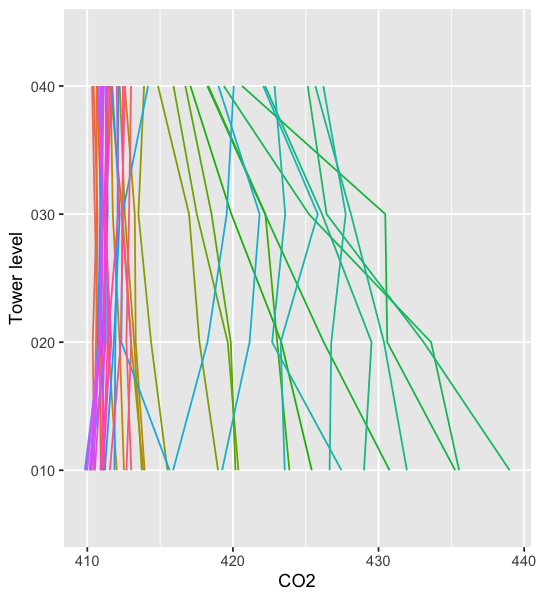

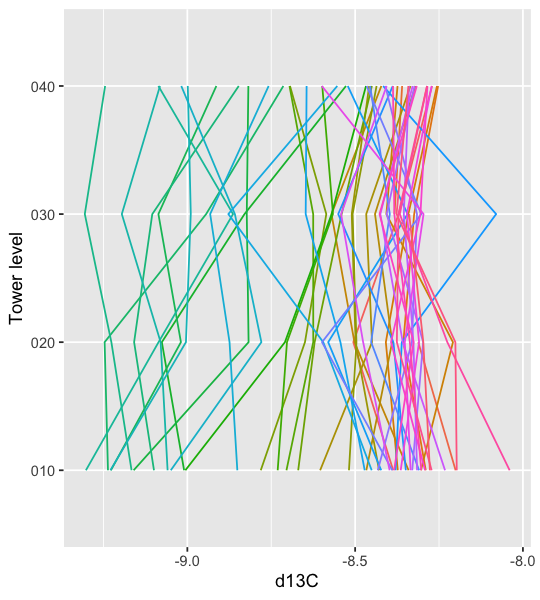

In [22]:
library(ggplot2)

# Plot CO2 profiles at times of day
g <- ggplot(iso.d, aes(y=verticalPosition)) + 
  geom_path(aes(x=data.co2Stor.rtioMoleDryCo2.mean, 
                group=timeBgn, col=timeBgn)) + 
  theme(legend.position="none") + 
  xlab("CO2") + ylab("Tower level")
g

# Plot 13C at times of day
g <- ggplot(iso.d, aes(y=verticalPosition)) + 
  geom_path(aes(x=data.isoCo2.dlta13CCo2.mean, 
                group=timeBgn, col=timeBgn)) + 
  theme(legend.position="none") + 
  xlab("d13C") + ylab("Tower level")
g

Warning message in which(is.na(as.numeric(iso.n$verticalPosition))):
“NAs introduced by coercion”Warning message:
“Removed 2724 rows containing missing values (geom_path).”

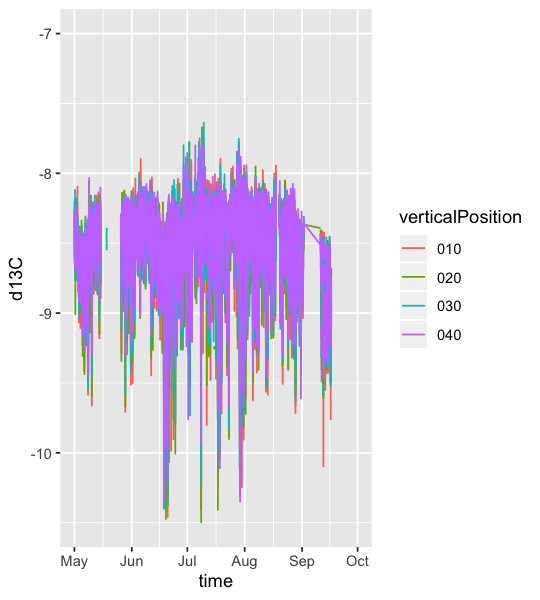

In [23]:
#Plot seasonal isotopes
iso.n <- iso$JORN#[grep("2018-06-25", iso$NIWO$timeBgn, fixed=T),]
iso.n <- iso.n[-which(is.na(as.numeric(iso.n$verticalPosition))),]
timeB <- substring(iso.n$timeBgn, 1, nchar(iso.n$timeBgn)-4)
timeB <- strptime(timeB, format="%Y-%m-%dT%H:%M:%S", tz="GMT")
timeB <- as.POSIXct(timeB)
iso.n <- cbind(timeB, iso.n)

g <- ggplot(iso.n, aes(x=timeB, y=data.isoCo2.dlta13CCo2.mean)) + 
  geom_path(aes(y=data.isoCo2.dlta13CCo2.mean, 
                group=verticalPosition, col=verticalPosition)) + 
  scale_x_datetime() +
  #  theme(legend.position="none") + 
  xlab("time") + ylab("d13C") + ylim(c(-10.5, -7))
g